# Week 4

## Objectives so far
* Read more about Pyomo and other tools that might work for multi-objective optimization in Python
* Read and summarize multiple multi-objective optimization papers for Paloma
* ~~Prepare 2 architectures (one low-data and one large-data and present them in June 27)~~
* ~~Prepare a presentation for literature review in June 30~~

## July 5
Today I decided to read and check the papers presented by Neil in the last meeting as these represent the latest information available that will probably be the most useful for our project. 

>**Title:** Representing Polymers as Periodic Graphs with Learned Descriptors for Accurate Polymer Property Predictions
>
>**Author(s):** Evan R. Antoniuk, Peggy Li, Bhavya Kailkhura, Anna M. Hiszpanski
>
>**Link:** [PDF Article](https://arxiv.org/pdf/2205.13757.pdf)
>
>**Important Points:**
>* *Context:* The paper aims to introduce a new polymer representation that solves a problem in polymer informatics: how do we represent/encode polymers in machine-readable representation? How do we bypass their incredibly large size —one that can go up to $10^6$ chemical subunits?
>* This new polymer representation is referred as a *polymer graph*, and it naturally includes polymer's periodicity in its representation; thus, resulting in a 20% average reduction in prediction errors. This representation is combined with a MPNN that can be used for property predictions reliably.
>* Monomer-based representations have been used as inputs for ML models before, but they usually have three shortcomings: **1.** they cannot generate certain unique representations for polymers with similar monomer units, **2.** they sometimes bond the polymer incorrectly, **3.** lack of periodicity. It is to note that these representations are usually extensions of models made for molecules to polymers —which might explain why they fail.
>* *Polymer Graph:* adding a bond between the two terminal ends of the polymer chain creates a periodic polymer representation; thus, ensuring a correct bonding environment for all atoms in the polymer.
>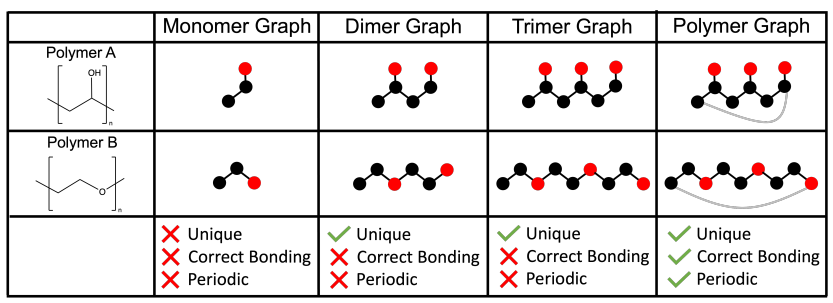
>* The researchers test the performance of these graph representations by collecting a dataset of polymer properties containing 15219 across 10 different properties. Then, they test the ML prediction model using monomer-representations and the polymer graph.
>* The graph-based representations are tested on a MPNN model, whereas Random Forest is used with the monomer descriptors representation.
>* *Results:* Graph-based models tend to outperform monomer descriptors.
>* Then, we compare polymer graph against monomer graph through a MPNN model, using structures with the same monomer unit in a test set of 179 glass transition temperature ($T_g$).
>* *Results:* The polymer graph outperforms the monomer graph in almost all metrics.
>* Then the paper goes on to further justify the importance of periodicity in these results by performing ablation studies on periodic graphs.

>**Title:** 3D Infomax improves GNNs for Molecular Property Prediction
>
>**Author(s):** Hannes Stärk, Dominique Beaini, Gabriele Corso, Prudencio Tossou, Christian Dallago, Stephan Günnemann, Pietro Liò
>
>**Link:** [PDF Article](https://arxiv.org/pdf/2110.04126.pdf)
>
>**Important Points:**
>* The researchers introduce a method called *3D Infomax* to solve the issue of GNNs having limitations on molecular property prediction and having classical molecular dynamics as computationally intractable.
>* The idea behind 3D Infomax is to pre-train a GNN by maximizing the mutual information between its embedding of a 2D molecular graph and a learned representation of a 3D graph.
>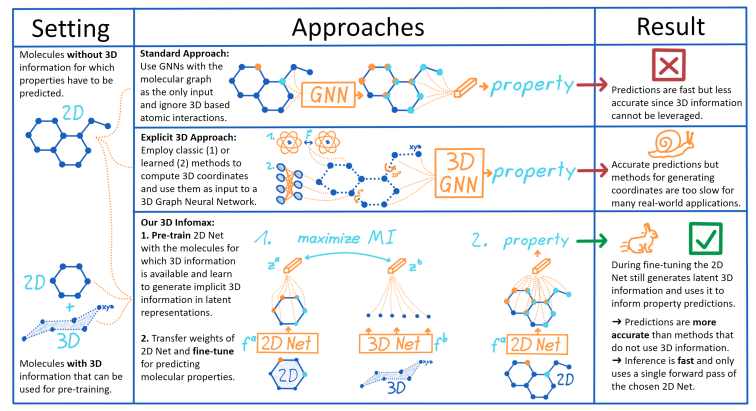
>* The method is evaluated by pre-training with 3D datasets before fine-tuning on quantum mechanical properties and evaluating the generalization of the learned representations.
>* *HOW DOES IT WORK?*
>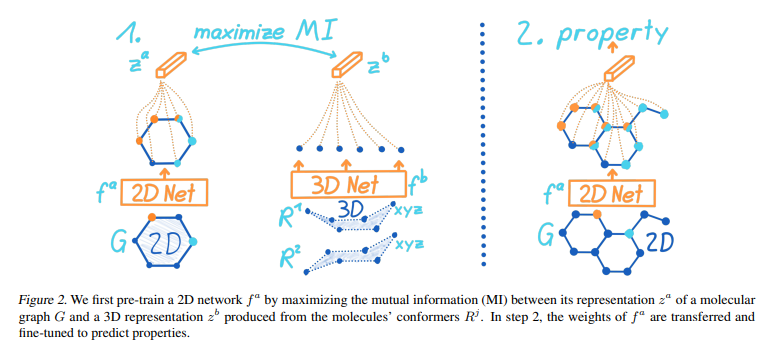
>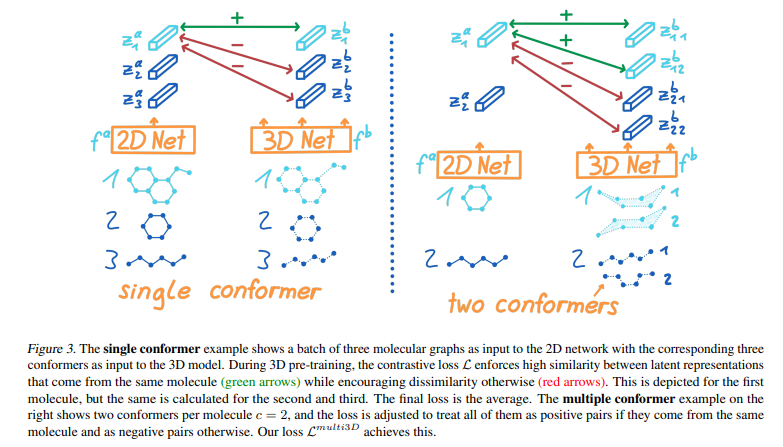
>    * We pre-train with contrastive learning. For this, we choose a loss function such that it maximizes similarities between 2D representation $z_i^a$ and 3D representation $z_i^b$ if they come from the same molecule, and it enforces dissimilarity if they do not come from the same molecule.
>    * We do this by using NTXent loss, given by 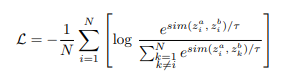 where $sim(z^a, z^b) = z^az^b/(\lVert{z^a}\rVert\lVert{z^b}\rVert)$ is the cosine similarity and $\tau$ is a temperature parameter.
>    * However, for multiple conformers we modify the loss: 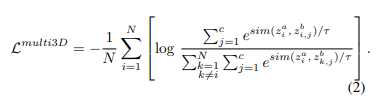
>    * The 3D Network takes as input the coordinates of the atoms as a 3D point cloud and produces a representation vector $z^b$ that encodes as much info as possible about the 3D structure. This information is encoded by the pairwise Euclidean distances $d_{uv}$ between atoms.
>* This model was tested in multiple experiments, and the consistent results are large improvements (~22%) for quantum properties, overshadowing previous methods.

In addition to this, I will install the PI1M library, and take some notes regarding how is it like.

<div class="alert alert-block alert-info">
<b>PI1M: A ~1 million polymer database</b>
<br><center><img src="https://raw.githubusercontent.com/LouisTheLuis/MCSC-Summer-2022/master/Summaries/image1.png" style="width:300px"></img></center></br>

<br>After downloading the database, I observed what was described on the paper for PI1M: there is no information about the properties of the polymers; only the p-SMILES representations. This can be seen as follows:</br>

<br><center><img src="https://raw.githubusercontent.com/LouisTheLuis/MCSC-Summer-2022/master/Summaries/image2.png" style="width:300px"></img></center></br>

<br>The database however, included some interesting development, which is the same list with the SA_Scores!
These scores work as a (sort of) proxy for the synthesizability of each polymer. Maybe this information could be useful; otherwise, this is kind of a dead end.</br>

<br><center><img src="https://raw.githubusercontent.com/LouisTheLuis/MCSC-Summer-2022/master/Summaries/image3.png" style="width:300px"></img></center></br>
</div>

## July 6
Paloma posted some papers that are important to read. Will do in a second.

>**Title:** Graph Convolutional Policy Network for Goal-Directed Molecular Graph Generation
>
>**Author(s):** Jiaxuan You, Bowen Liu, Rex Ying, Vijay Pande, Jure Leskovec
>
>**Link:** [PDF Article](https://proceedings.neurips.cc/paper/2018/file/d60678e8f2ba9c540798ebbde31177e8-Paper.pdf)
>
>**Important Points:**
>* This paper proposees a *Graph Convolutional Policy Network (GCPN)*; an architecture to generate molecules with certain desired properties. This is done by extending three ideas: graph representation, reinforcement learning, and adversarial training.
>* *Graph representation:* the molecules in this framework are represented through molecular graphs, instead of strings like SMILES.
>* *Reinforcement Learning:* this approach is used due to two reasons: **1.** It can directly represent constrains and desired properties through the objective function and **2.** Allows exploration of the molecule space beyond the training set.
>* *Adversarial Training:* this is used to guide the training of the generator towards a certain set of rules (e.g. physiological conditions, physiochemical properties, etc.).
>* The researchers evaluate GCPN in three tasks using the ZINC dataset:
>    * molecule property optimization
>    * property targeting
>    * conditional property optimization
>* GCPN achieves property scores 61% higher than the best baseline method, and outperforms baseline models in the constrained optimization by 184% on average.
>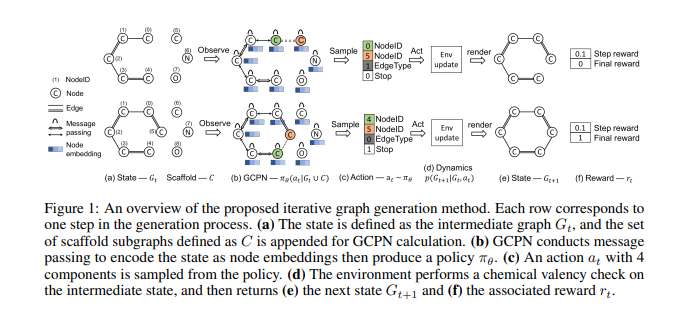
> The reinforcement learning part consists of a graph generation process in which we start with a carbon atom in a graph $G_0$, and slowly add new subgraphs or connect nodes within $G_t$. These transitions are made according to chemical rules (valency check). The reward incorporates the property scores (e.g. logP, QUED, MW).
>* This method ensures 100% validity.

>**Title:** Optimization of Molecules via Deep Reinforcement Learning
>
>**Author(s):** Zhenpeng Zhou, Steven Kearnes, Li Li, Richard N. Zare, Patrick Riley 
>
>**Link:** [PDF Article](https://www.nature.com/articles/s41598-019-47148-x.pdf)
>
>**Important Points:**
>* The researchers of this paper introduce a new molecule optimization framework named *Molecule Deep Q-Networks (MolDQN)*, which combine chemistry knowledge with reinforcement learning (MDP).
>* The molecules generated are ensured to be valid by allowing only *chemically valid actions*. 
>* Then, we use the technique of *Deep Q-Networks (DQN)* to solve this MDP, using the desired properties as rewards.
>* The molecule modification process is here constructed as a Markov Decision Process, with the following specifications:
>     * Explicit limit on number of steps
>     * Do not allow chemically invalid actions (violations of valence constraints)
>     * Allow atoms/bonds to be removed or added
>     * The states $s_t = (m, t)$ where $m$ is a valid molecule and $t$ the number of steps. The actions $a_t$, which represent either atom addition, bond addition or bond removal (when chemically valid). The reward is given at each step, and is often a property of the molecule $m$.
>* We use Q-learning and a Huber loss function.
>* To achieve *multi-objective optimization*, the total reward is given by:
>     * A vector of rewards $\overrightarrow{r_t} = [r_{1,t}, ..., r_{k, t}]^T$ updated at each step $t$
>     * A weight vector $w = [w_1, ..., w_t]^T$ that defines the scalability of each property to the user's preference
>     * The total reward, then, is given by: $$r_{s, t} = w^T\overrightarrow{r_t} = \sum_{i=1}^{k}w_ir_{i,t}$$ which is then maximized by the MDP
>* In order to balance exploitation vs. exploration, we utilize randomized value functions to achieve deep exploration. We also use ε-greedy as policy.
>* MolDQN is compared with JT-VAE, GCPN and ORGAN. In *single-property optimization*, MolDQN demonstrates better performance thatn GCPN on the task of logP and similar on QED (with higher values on bootstrapped). In *constrained optimization*, MolDQN outperforms GCPN. 